In [28]:
import tensorflow as tf

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
%matplotlib inline
sns.set(rc={"figure.dpi":150, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 100
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

### Predict
    - Visibility
    - Precipitation
    - Temperature
    - Pressure
    - Humidity

In [40]:
raw = pd.read_excel('weather data.xls', sheet_name='weather_data_1hr', index_col=None)

In [41]:
raw.columns

Index(['loc_id', 'date', 'time', 'isdaytime', 'tempC', 'tempF',
       'windspeedMiles', 'windspeedKmph', 'winddirdegree', 'winddir16point',
       'weatherCode', 'weatherIconUrl', 'weatherDesc', 'precipMM',
       'precipInches', 'humidity', 'visibilityKm', 'visibilityMiles',
       'pressureMB', 'pressureInches', 'cloudcover', 'HeatIndexC',
       'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF',
       'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF'],
      dtype='object')

### Remove attributes represented multiple times and irrelevant features

In [42]:
raw.drop(['windspeedKmph','tempF','precipInches','visibilityKm', 'pressureInches','HeatIndexF','DewPointF','WindChillF','WindGustKmph','FeelsLikeF'], axis=1, inplace=True)

In [43]:
raw.drop(['loc_id','weatherIconUrl'], axis=1, inplace=True)

In [44]:
raw['isdaytime'].replace('no',0, inplace = True)
raw['isdaytime'].replace('yes',1, inplace = True)


In [45]:
raw

date  time  isdaytime  tempC  windspeedMiles  winddirdegree  \
0     2008-07-01     0          0     22               2            304   
1     2008-07-01   100          0     22               2            296   
2     2008-07-01   200          0     21               2            287   
3     2008-07-01   300          0     21               2            278   
4     2008-07-01   400          0     21               2            278   
...          ...   ...        ...    ...             ...            ...   
65530 2015-12-22  1000          1     30               6             54   
65531 2015-12-22  1100          1     32               6             57   
65532 2015-12-22  1200          1     34               6             61   
65533 2015-12-22  1300          1     34               6             61   
65534 2015-12-22  1400          1     34               6             60   

      winddir16point  weatherCode weatherDesc  precipMM  humidity  \
0                 NW          248         Fog       0.0        98   
1                WNW          248         Fog       0.0        98   
2                WNW          248         Fog       0.0        98   
3                  W          248         Fog       0.0        98   
4                  W          248         Fog       0.0        98   
...              ...          ...         ...       ...       ...   
65530             NE          113       Sunny       0.0        20   
65531            ENE          113       Sunny       0.0        18   
65532            ENE          113       Sunny       0.0        16   
65533            ENE          113       Sunny       0.0        15   
65534            ENE          113       Sunny       0.0        15   

       visibilityMiles  pressureMB  cloudcover  HeatIndexC  DewPointC  \
0                    0        1014         100          25         22   
1                    0        1014         100          25         22   
2                    0        1014         100          24         21   
3                    0        1014         100          24         21   
4                    0        1014          75          24         21   
...                ...         ...         ...         ...        ...   
65530                6        1014           3          28          5   
65531                6        1014           3          30          4   
65532                6        1013           2          32          4   
65533                6        1012           3          32          4   
65534                6        1011           3          32          4   

       WindChillC  WindGustMiles  FeelsLikeC  
0              22              4          22  
1              22              5          22  
2              22              5          22  
3              21              5          21  
4              22              4          22  
...           ...            ...         ...  
65530          30              6          28  
65531          32              7          30  
65532          34              7          32  
65533          34              7          32  
65534          34              7          32  

[65535 rows x 19 columns]

### Label Encoder for 'winddir16point' and 'weatherDesc'

In [46]:
data = pd.get_dummies(raw,prefix=['winddir16point','weatherDesc'], columns = ['winddir16point', 'weatherDesc'], drop_first=True)

In [47]:
data.columns

Index(['date', 'time', 'isdaytime', 'tempC', 'windspeedMiles', 'winddirdegree',
       'weatherCode', 'precipMM', 'humidity', 'visibilityMiles', 'pressureMB',
       'cloudcover', 'HeatIndexC', 'DewPointC', 'WindChillC', 'WindGustMiles',
       'FeelsLikeC', 'winddir16point_ENE', 'winddir16point_ESE',
       'winddir16point_N', 'winddir16point_NE', 'winddir16point_NNE',
       'winddir16point_NNW', 'winddir16point_NW', 'winddir16point_S',
       'winddir16point_SE', 'winddir16point_SSE', 'winddir16point_SSW',
       'winddir16point_SW', 'winddir16point_W', 'winddir16point_WNW',
       'winddir16point_WSW', 'weatherDesc_Cloudy', 'weatherDesc_Fog',
       'weatherDesc_Heavy rain', 'weatherDesc_Heavy rain at times',
       'weatherDesc_Light drizzle', 'weatherDesc_Light rain',
       'weatherDesc_Light rain shower', 'weatherDesc_Mist',
       'weatherDesc_Moderate or heavy rain shower',
       'weatherDesc_Moderate or heavy rain with thunder',
       'weatherDesc_Moderate rain', 'weatherD

### A brief look into the data and the features to be predicted

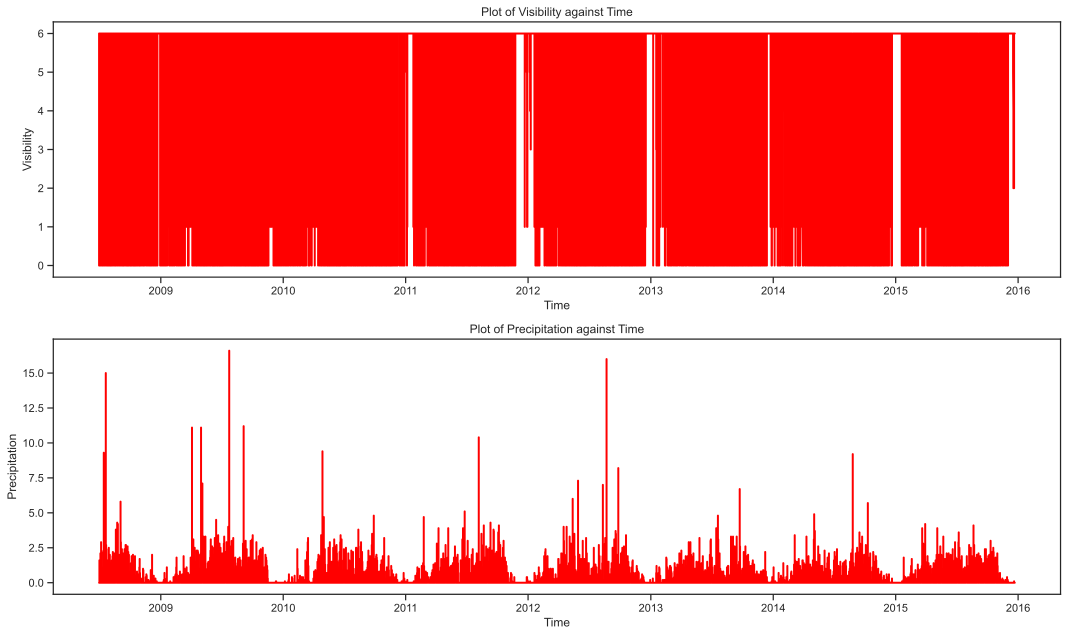

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,9),dpi=100)
for y_axis,rang,what in zip((data.visibilityMiles, data.precipMM),(211,212), ('Visibility','Precipitation')):
    ax=plt.subplot(rang)
    ax.plot(data.date,y_axis, color = 'red', linewidth=2)
    ax.set_xlabel("Time")
    ax.set_ylabel(what)
    ax.set_title("Plot of "+ str(what) + " against Time")
fig.tight_layout()

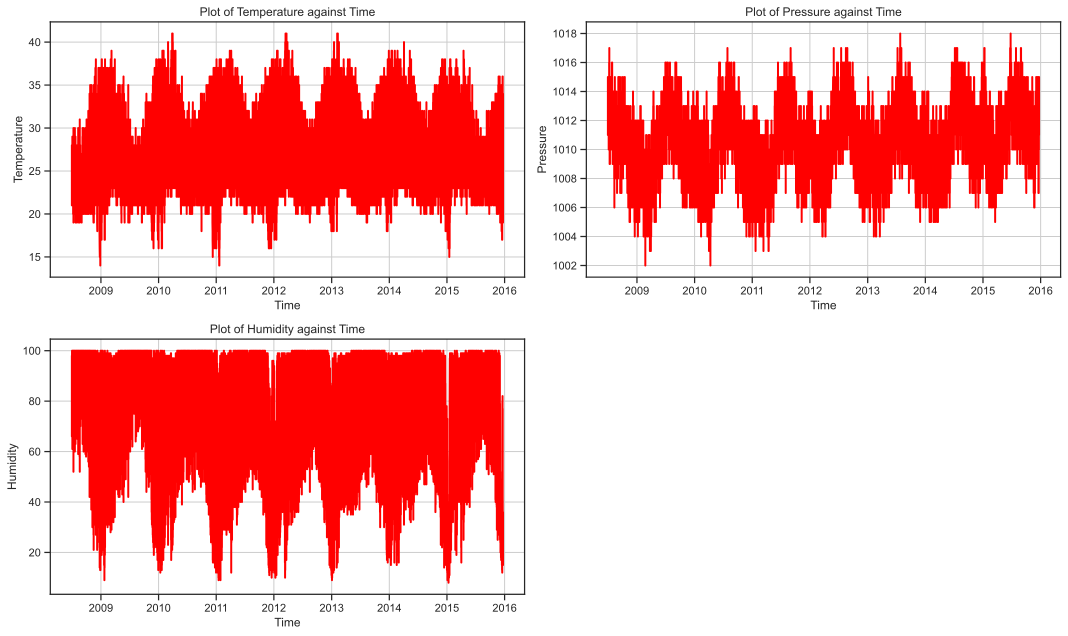

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,9),dpi=100)
for y_axis,rang,what in zip((data.tempC, data.pressureMB, data.humidity),(221,222,223), ('Temperature','Pressure','Humidity')):
    ax=plt.subplot(rang)
    ax.plot(data.date,y_axis, color = 'red', linewidth=2)
    ax.set_xlabel("Time")
    ax.grid(True)
    ax.set_ylabel(what)
    ax.set_title("Plot of "+ str(what) + " against Time")
fig.tight_layout()